In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import mnist

In [2]:
dataset_dir = "./mnist_data/MNIST/raw/"

train_features, train_labels = mnist.load_dataset(
    os.path.join(dataset_dir, "train-images-idx3-ubyte.gz"),
    os.path.join(dataset_dir, "train-labels-idx1-ubyte.gz"),
    total_images=60000,
    image_size=28,
)
train_features /= 255.0

test_features, test_labels = mnist.load_dataset(
    os.path.join(dataset_dir, "t10k-images-idx3-ubyte.gz"),
    os.path.join(dataset_dir, "t10k-labels-idx1-ubyte.gz"),
    total_images=10000,
    image_size=28,
)
test_features /= 255.0

print(train_features.shape, train_labels.shape)
print(test_features.shape, test_labels.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


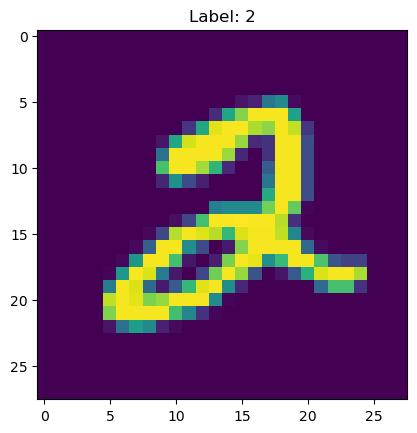

In [3]:
# plotting the image
idx = 5
image = train_features[idx]
plt.title(f"Label: {train_labels[idx]}")
plt.imshow(image)
plt.show()

In [4]:
train_features = train_features.reshape(train_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

# Logistic Regression

## 1. What Problem is Logistic Regression Used to Solve?

Logistic regression is used to solve **classification problems**, where the goal is to predict discrete categories or labels rather than continuous values. While standard logistic regression is often used for **binary classification** (predicting one of two possible classes, like “spam” or “not spam”), the approach can also be extended to handle **multiclass classification** tasks. This extension is called **multinomial logistic regression** (or softmax regression). Multinomial logistic regression allows us to classify data into more than two categories, such as predicting types of animals, customer segments, or product categories.

## 2. What Assumption Does the Model Make?

Logistic regression assumes a **linear relationship** between the input features and the **log-odds** (logarithm of the odds) of the class probabilities. This assumption implies that a linear combination of the input features can adequately separate the classes. For binary logistic regression, this means the log-odds of the probability of one class versus the other is linearly related to the features.

In multinomial logistic regression, we extend this assumption by creating separate linear functions for each class. For $K$ classes, we have $K$ sets of weights and intercepts, each modeling the log-odds of one class relative to a baseline class. This results in $K - 1$ decision boundaries in the feature space, each approximated as a linear function, dividing the space into regions corresponding to each class.

## 3. What is the Model?

Logistic regression uses a **logistic function** (sigmoid) to transform the linear combination of input features into a probability between 0 and 1. The model for binary logistic regression is:

$$
P(y=1|X) = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

where $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$, and $\sigma(z)$ is the sigmoid function. Here, $P(y=1|X)$ represents the probability that the input $X$ belongs to the positive class.

For **multinomial logistic regression**, we generalize this with the **softmax function**. Given $K$ possible classes, the model computes the probability for each class $j$ as:

$$
P(y=j|X) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}
$$

where $z_j = \beta_{j0} + \beta_{j1} x_1 + \beta_{j2} x_2 + ... + \beta_{jn} x_n$ is the linear score for class $j$. The softmax function ensures that the probabilities for all classes sum to 1, making it suitable for multiclass classification. The class with the highest probability is typically chosen as the predicted class.

## 4. How is the Model Trained?

Logistic regression is trained by **maximizing the likelihood** of the observed class labels, a process known as **maximum likelihood estimation (MLE)**. In binary logistic regression, this involves minimizing a **log loss** (or binary cross-entropy) function:

$$
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

where $\hat{y}_i$ is the predicted probability for the positive class for each data point $i$, and $y_i$ is the actual label.

For **multinomial logistic regression**, the model optimizes a **multiclass log loss** (or cross-entropy) function:

$$
\text{Multiclass Log Loss} = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^K y_{ij} \log(P(y=j|X_i))
$$

where $y_{ij}$ is a binary indicator (1 if sample $i$ belongs to class $j$, 0 otherwise), and $P(y=j|X_i)$ is the predicted probability for class $j$.

Training both binary and multinomial logistic regression models involves adjusting the weights $\beta$ to minimize the log loss. Optimization techniques like **gradient descent** or **stochastic gradient descent** are often used to efficiently update the weights during training. This iterative process continues until the model reaches a set of weights that minimize the loss, resulting in a model that can make accurate classifications on unseen data.

In [5]:
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression()
logistic_regressor.fit(train_features, train_labels)

logistic_reg_train_accuracy = logistic_regressor.score(train_features, train_labels)
logistic_reg_test_accuracy = logistic_regressor.score(test_features, test_labels)

print(f"Train accuracy: {logistic_reg_train_accuracy}")
print(f"Test accuracy: {logistic_reg_test_accuracy}")

Train accuracy: 0.9346166666666667
Test accuracy: 0.9256


/Users/ericduong/miniforge3/envs/torch/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# K-Nearest Neighbors (KNN) Algorithm

## 1. What problem is KNN used to solve?
K-Nearest Neighbors (KNN) is a supervised machine learning algorithm primarily used for classification and regression tasks. It is especially popular for **multi-class classification problems** where the goal is to predict a class label for a given input based on its similarity to known instances. In a multi-class classification context, KNN assigns an input to one of several classes by looking at the class labels of its "neighbors" in the feature space.

## 2. What assumption does the model make?
KNN assumes that **similar instances in the feature space belong to the same class**. This assumption, often referred to as the **continuity assumption**, implies that data points close in the feature space are likely to share the same class label. It works well when the decision boundaries between classes are not complex and the classes are relatively well-separated in the feature space. 

## 3. What is the model?
KNN is a **non-parametric, instance-based learning model**. It does not involve any training of parameters, as it stores the entire training dataset for decision-making. For a given input point, KNN computes the distance between this point and all points in the training set, identifying the $k$ nearest points (neighbors). The **class of the input point** is determined by a majority vote of these $k$ nearest neighbors.

Mathematically:
- Let $X = \{x_1, x_2, \ldots, x_n\}$ represent the feature space of $n$ training samples.
- For a new input $x'$, KNN finds the set of $k$ points $N(x') \subset X$ that are closest to $x'$ based on a distance metric (e.g., Euclidean distance).

If $y_i$ represents the class label of a point $x_i$, the predicted class $\hat{y}'$ of $x'$ is determined by:
$$
\hat{y}' = \arg \max_{y} \sum_{x_i \in N(x')} \mathbb{1}(y_i = y)
$$
where $\mathbb{1}$ is an indicator function that equals 1 if $y_i = y$ and 0 otherwise.

## 4. How is the model trained?
KNN is an **instance-based model**, meaning it has no explicit training phase where model parameters are optimized. Instead, **training** in KNN simply involves storing the labeled dataset. During inference or prediction, the model calculates distances between a new input and each point in the training set to find the $k$ nearest neighbors.

For multi-class classification:
1. For a new input point, compute distances to all training samples.
2. Select the $k$ nearest samples.
3. Assign the class that is most frequent among these $k$ neighbors.

Thus, KNN's complexity lies in the prediction phase, where it needs to compare each new input with the entire training set, making it computationally intensive for large datasets.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with 5 number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(train_features, train_labels)

# Evaluate the KNN model
knn_train_accuracy = knn.score(train_features, train_labels)
knn_test_accuracy = knn.score(test_features, test_labels)

print(f"KNN Train accuracy: {knn_train_accuracy}")
print(f"KNN Test accuracy: {knn_test_accuracy}")

KNN Train accuracy: 0.9819166666666667
KNN Test accuracy: 0.9688


# Naive Bayes Algorithm

## 1. What problem is Naive Bayes used to solve?
Naive Bayes is a family of supervised machine learning algorithms commonly used for **classification problems**, particularly effective for **multi-class classification**. It is widely applied in text classification (such as spam detection) and in cases where feature independence is a reasonable assumption. Naive Bayes is a probabilistic classifier that assigns a class label to a given instance by calculating the posterior probability for each class and choosing the class with the highest probability.

## 2. What assumption does the model make?
Naive Bayes makes the **naive independence assumption**, meaning that it assumes all features (predictors) are conditionally independent given the class label. This assumption simplifies the computation of probabilities, as the joint probability of the features given the class can be factored into the product of the individual feature probabilities:
$$
P(x_1, x_2, \ldots, x_n | y) = \prod_{i=1}^n P(x_i | y)
$$
where $x_i$ represents a feature and $y$ represents the class label. Although this assumption is often violated in practice, Naive Bayes can still perform well, particularly with large datasets.

## 3. What is the model?
Naive Bayes is a **generative model** based on **Bayes’ theorem**. For a new instance with features $x = (x_1, x_2, \ldots, x_n)$, Naive Bayes calculates the **posterior probability** for each class $y$ by using:
$$
P(y | x) = \frac{P(y) \cdot P(x | y)}{P(x)}
$$
Since we are only interested in the class that maximizes $P(y | x)$, we can ignore $P(x)$ (as it remains constant for all classes) and focus on:
$$
P(y | x) \propto P(y) \prod_{i=1}^n P(x_i | y)
$$
The model uses the prior probability $P(y)$ and the likelihood $P(x_i | y)$ for each feature $x_i$ to compute the posterior probability of each class. In a **multi-class classification** setting, Naive Bayes calculates this probability for each possible class and assigns the class with the highest probability.

## 4. How is the model trained?
Training a Naive Bayes model involves estimating the probabilities needed for classification:
1. **Prior probability $P(y)$** for each class $y$: This is estimated from the training data as the fraction of instances belonging to each class.
2. **Likelihood $P(x_i | y)$** for each feature $x_i$ given the class $y$: This depends on the type of data and the specific Naive Bayes variant (e.g., Gaussian Naive Bayes for continuous data, Multinomial Naive Bayes for discrete data). For example:
   - In a **Gaussian Naive Bayes** classifier (for continuous data), $P(x_i | y)$ is modeled with a Gaussian distribution, where mean and variance are estimated for each feature within each class.
   - In a **Multinomial Naive Bayes** classifier (for text data or count features), $P(x_i | y)$ is based on the frequency of feature values within each class.

During prediction, Naive Bayes uses the estimated priors and likelihoods to calculate the posterior probability for each class, allowing it to classify the input into one of multiple classes based on the highest posterior probability.

In [7]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the Gaussian Naive Bayes model
gnb.fit(train_features, train_labels)

# Evaluate the Gaussian Naive Bayes model
gnb_train_accuracy = gnb.score(train_features, train_labels)
gnb_test_accuracy = gnb.score(test_features, test_labels)

print(f"Gaussian Naive Bayes Train accuracy: {gnb_train_accuracy}")
print(f"Gaussian Naive Bayes Test accuracy: {gnb_test_accuracy}")

Gaussian Naive Bayes Train accuracy: 0.5649
Gaussian Naive Bayes Test accuracy: 0.5558


# Decision Tree Algorithm

## 1. What problem is Decision Tree used to solve?
Decision Trees are supervised learning algorithms that can be used for both **classification and regression** tasks. They are particularly effective in **multi-class classification** problems, where they recursively split the data into subsets based on feature values, leading to a tree-like structure that makes classification decisions. Decision Trees are popular due to their interpretability and their ability to handle both categorical and continuous data.

## 2. What assumption does the model make?
Decision Trees make a few implicit assumptions:
1. **Feature splits can sufficiently separate classes**: The model assumes that one or more features will have values that enable effective splits to distinguish between classes.
2. **Local decision boundaries**: Decision Trees assume that local, axis-aligned splits of features can approximate the decision boundary between classes, which works well when the data has regions that align with these splits.
   
These assumptions are often reasonable for simpler, well-separated data, but for complex data, they can lead to overfitting if the tree grows too deep.

## 3. What is the model?
A Decision Tree is a **tree-structured model** where:
- **Nodes** represent a decision based on a feature.
- **Edges** represent the outcome of a decision, leading to a new subset of the data.
- **Leaves** represent a class label (in classification) or a value (in regression).

The tree is built by iteratively selecting the best feature and value for splitting the data at each node. This selection is based on **impurity reduction**, with measures such as **Gini impurity** or **entropy** in classification tasks.

For a feature $x$ that splits the data into subsets $D_1$ and $D_2$, the impurity reduction can be calculated using:
$$
\text{Gain}(x) = \text{Impurity}(D) - \left( \frac{|D_1|}{|D|} \text{Impurity}(D_1) + \frac{|D_2|}{|D|} \text{Impurity}(D_2) \right)
$$
where $|D|$ is the number of instances in subset $D$, and $\text{Impurity}(D)$ could be calculated using Gini or entropy. 

The tree classifies an input by following the decisions from the root to a leaf, yielding a class label. In **multi-class classification**, each leaf node can represent one of the multiple classes based on the majority class of the instances in that node.

## 4. How is the model trained?
Training a Decision Tree involves:
1. **Choosing the best feature and value** to split the data at each node. This is done by calculating the impurity reduction for each feature split and selecting the one with the highest reduction.
2. **Recursively splitting** the data into subsets at each new node until a stopping criterion is met (e.g., a maximum depth, a minimum number of samples per node, or no further impurity reduction).
3. **Assigning a class label** at each leaf node based on the majority class among the instances in that node.

The training process continues until the tree reaches a structure that can classify the data with reasonable accuracy, but careful tuning is needed to avoid **overfitting**. In the context of multi-class classification, the tree learns to partition the feature space so that each region corresponds to one of the multiple classes based on the majority rule at each leaf.

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Train the Decision Tree model
decision_tree.fit(train_features, train_labels)

# Evaluate the Decision Tree model
decision_tree_train_accuracy = decision_tree.score(train_features, train_labels)
decision_tree_test_accuracy = decision_tree.score(test_features, test_labels)

print(f"Decision Tree Train accuracy: {decision_tree_train_accuracy}")
print(f"Decision Tree Test accuracy: {decision_tree_test_accuracy}")

Decision Tree Train accuracy: 1.0
Decision Tree Test accuracy: 0.8791


# Support Vector Machine (SVM) Algorithm

## 1. What problem is Support Vector Machine used to solve?
Support Vector Machines (SVM) are supervised learning algorithms primarily used for **classification** tasks, although they can also be used for regression. SVMs are well-suited for **binary and multi-class classification** problems, especially when there is a clear margin of separation between classes. The algorithm aims to find an optimal hyperplane that maximally separates instances of different classes, making it particularly effective in high-dimensional spaces.

## 2. What assumption does the model make?
SVM assumes that:
1. **Data is linearly separable** (in a transformed feature space if necessary): It assumes that a hyperplane or a set of hyperplanes can separate the classes with a maximum margin. If the data is not linearly separable in the input space, the **kernel trick** is applied to transform the data into a higher-dimensional space where it becomes separable.
2. **Maximizing the margin improves generalization**: SVM assumes that the best decision boundary is the one that maximizes the margin (distance) between the closest points (support vectors) of different classes. This helps the model generalize well to unseen data.

These assumptions work well when there is a clear margin between classes, but they may be limiting when classes are highly overlapping or not easily separable.

## 3. What is the model?
SVM is a **discriminative model** that seeks to find an optimal **hyperplane** for separating classes. For a binary classification problem in $n$-dimensional space, the hyperplane is defined as:
$$
w \cdot x + b = 0
$$
where $w$ is the weight vector perpendicular to the hyperplane, $x$ is a feature vector, and $b$ is the bias term.

The goal of SVM is to maximize the margin $M$ between the hyperplane and the nearest data points from each class, known as **support vectors**. Mathematically, this can be represented by minimizing $\| w \|$, subject to the constraints:
$$
y_i (w \cdot x_i + b) \geq 1
$$
for each training sample $(x_i, y_i)$, where $y_i \in \{-1, 1\}$ indicates the class label. The hyperplane that satisfies these constraints with the maximum margin is selected as the decision boundary.

In **multi-class classification**, SVM can be extended using methods such as:
- **One-vs-One (OvO)**: Training an SVM classifier for every pair of classes.
- **One-vs-All (OvA)**: Training an SVM classifier for each class against all other classes.

The class with the highest confidence score is selected for each new instance.

## 4. How is the model trained?
Training an SVM involves solving an **optimization problem** to find the values of $w$ and $b$ that maximize the margin while correctly classifying the data points. The optimization problem can be formulated as:
$$
\min_{w, b} \frac{1}{2} \| w \|^2
$$
subject to the constraints:
$$
y_i (w \cdot x_i + b) \geq 1 \quad \forall i
$$

For data that is not perfectly separable, **soft margin SVM** introduces a penalty term for misclassification by using slack variables $\xi_i$. The optimization problem then becomes:
$$
\min_{w, b} \frac{1}{2} \| w \|^2 + C \sum_{i} \xi_i
$$
subject to:
$$
y_i (w \cdot x_i + b) \geq 1 - \xi_i \quad \forall i
$$
where $C$ is a regularization parameter that balances maximizing the margin and minimizing classification errors.

For **non-linear data**, the kernel trick transforms the data into a higher-dimensional space using a kernel function $K(x_i, x_j)$, such as:
- **Linear kernel**: $K(x_i, x_j) = x_i \cdot x_j$
- **Polynomial kernel**: $K(x_i, x_j) = (x_i \cdot x_j + 1)^d$
- **Radial basis function (RBF)**: $K(x_i, x_j) = \exp(-\gamma \| x_i - x_j \|^2)$

After training, SVM uses the support vectors and learned parameters to classify new inputs based on which side of the hyperplane they fall, allowing for robust classification even in complex multi-class scenarios.

In [9]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC()

# Train the SVM model
svm_model.fit(train_features, train_labels)

# Evaluate the SVM model
svm_train_accuracy = svm_model.score(train_features, train_labels)
svm_test_accuracy = svm_model.score(test_features, test_labels)

print(f"SVM Train accuracy: {svm_train_accuracy}")
print(f"SVM Test accuracy: {svm_test_accuracy}")

KeyboardInterrupt: 

# Random Forest Algorithm

## 1. What problem is Random Forest used to solve?
Random Forest is a versatile supervised learning algorithm that can be used for both **classification and regression** tasks. It is particularly effective for **multi-class classification** problems where the goal is to assign one of several possible class labels to an input. Random Forest enhances the performance of individual decision trees by creating an ensemble of trees, which reduces overfitting and improves accuracy, especially when handling complex datasets.

## 2. What assumption does the model make?
Random Forest assumes that:
1. **Individual trees provide independent and complementary views** of the data, so aggregating their predictions will improve the overall accuracy and robustness.
2. **Data can be effectively separated by multiple decision trees working together**, each capturing a different aspect of the data's structure.

These assumptions allow Random Forest to handle high-dimensional and complex data well, as it averages over multiple uncorrelated trees to reduce variance and make more stable predictions.

## 3. What is the model?
Random Forest is an **ensemble model** composed of multiple decision trees, each built on a random subset of the training data. Each tree is trained independently and is slightly different due to the random selection of data and features. The model’s prediction is an **aggregate of all the individual trees’ predictions**.

For **classification**, Random Forest uses **majority voting**:
- Let each tree in the forest predict a class label for an input instance.
- The class that receives the majority of votes across all trees is the final prediction for that instance.

In **multi-class classification**, each tree provides a class prediction from among multiple possible classes, and the final predicted class is the one that appears most frequently across all trees.

## 4. How is the model trained?
Training a Random Forest involves the following steps:
1. **Bootstrap Sampling**: From the training dataset with $N$ samples, a **random subset with replacement** is drawn to train each individual tree. This subset is called a **bootstrap sample**. The bootstrapping process creates diversity among the trees by providing each tree with slightly different data.

2. **Feature Selection at Splits**: At each split within a tree, a random subset of features (out of the total features) is considered to determine the best split. This further introduces diversity by ensuring that trees focus on different features, making them less correlated.

3. **Tree Building**: Each tree is grown to its full depth without pruning, meaning that each tree will independently capture various patterns in the data. Trees are built using traditional methods like **Gini impurity** or **entropy** for classification splits, aiming to maximize the purity of nodes.

4. **Aggregation**: For classification, the final output of the Random Forest is determined by **majority voting** among the trees. For each input, the class with the most votes across all trees is selected as the final class label.

Overall, the Random Forest model combines the predictions of multiple uncorrelated trees, resulting in improved accuracy, stability, and resilience to overfitting, making it highly effective for multi-class classification tasks.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest = RandomForestClassifier()

# Train the Random Forest model
random_forest.fit(train_features, train_labels)

# Evaluate the Random Forest model
random_forest_train_accuracy = random_forest.score(train_features, train_labels)
random_forest_test_accuracy = random_forest.score(test_features, test_labels)

print(f"Random Forest Train accuracy: {random_forest_train_accuracy}")
print(f"Random Forest Test accuracy: {random_forest_test_accuracy}")

# Gradient Boosting Machines (GBM)

## 1. What problem is Gradient Boosting Machines (GBM) used to solve?

Gradient Boosting Machines (GBM) are powerful supervised learning algorithms used for both **classification and regression** tasks. They are particularly well-suited for complex **multi-class classification** problems where high predictive accuracy is required. GBMs are effective because they combine the predictions of multiple weak learners (typically shallow decision trees) to create a strong predictive model, achieving state-of-the-art results in many areas, including tabular data and structured datasets.

## 2. What assumption does the model make?

GBM assumes that:
1. **Errors can be reduced iteratively**: The algorithm assumes that by sequentially building trees that focus on correcting the errors of previous trees, it can minimize overall error.
2. **Weak learners (small trees) can be boosted**: GBM assumes that even simple models (shallow decision trees) can contribute to a highly accurate ensemble model if they are correctly trained in sequence.

These assumptions enable GBM to build a model that improves over each iteration, ultimately achieving high predictive performance.

## 3. What is the model?

GBM is an **ensemble model** that builds a strong predictor by combining multiple weak learners, often shallow decision trees. The model works by adding trees in a sequence, where each new tree is trained to correct the errors of the previous trees. Instead of averaging or voting like in Random Forests, GBM **boosts** the model's accuracy by learning residual errors.

In a **multi-class classification** context, GBM trains separate trees for each class and combines them to assign the final class with the highest probability. The final prediction is the sum of all the trees’ contributions for each class, resulting in a model that can handle multiple class labels.

## 4. How is the model trained?

Training a GBM model involves an **iterative, stage-wise approach** where each tree is trained to minimize the residual errors of the ensemble so far. The process is as follows:

1. **Initialize the model**: The model begins by making an initial guess, often by predicting the average of the target values.

2. **Calculate Residuals**: For each iteration, the residual error (the difference between the actual and predicted values) is calculated.

3. **Train a Weak Learner**: A new decision tree is trained to predict the residuals from the previous model. This tree is added to the ensemble, focusing on correcting the errors made by the previous trees.

4. **Update the Prediction**: The predictions are updated by adding a fraction of the new tree’s predictions to the overall model. This fraction is controlled by a parameter called the **learning rate** $\alpha$, which regulates the contribution of each tree to prevent overfitting.

5. **Repeat**: Steps 2 to 4 are repeated for a specified number of iterations or until a desired error threshold is reached. Each new tree gradually reduces the overall error, improving the model’s predictive accuracy.

In mathematical terms, the model’s prediction at iteration $t$ is given by:
$$
F_t(x) = F_{t-1}(x) + \alpha \cdot h_t(x)
$$
where $F_t(x)$ is the updated prediction, $F_{t-1}(x)$ is the prediction from the previous iteration, $\alpha$ is the learning rate, and $h_t(x)$ is the new tree trained on the residuals. This process continues until the model converges or reaches the maximum number of iterations.

## 5. Light Gradient Boosting Machines

**Light Gradient Boosting Machine (LightGBM)** is an optimized version of GBM designed for faster training on large datasets, particularly when there are many features. LightGBM introduces several innovations to improve efficiency and accuracy:

- **Leaf-wise Growth**: Unlike traditional GBM that grows trees level-by-level, LightGBM grows trees leaf-by-leaf. This approach allows LightGBM to focus on the areas with the most significant errors, resulting in better accuracy and reduced computation.
  
- **Gradient-based One-Side Sampling (GOSS)**: LightGBM selects a subset of data with larger gradients, which helps the model focus on instances with higher errors. This reduces the amount of data that needs to be processed without sacrificing accuracy.
  
- **Exclusive Feature Bundling (EFB)**: LightGBM groups mutually exclusive features (those that rarely take non-zero values simultaneously) into a single feature. This feature bundling reduces the dimensionality of the data, speeding up training and reducing memory usage.

In **multi-class classification**, LightGBM handles multiple classes efficiently by training separate trees for each class, similar to traditional GBM, but with the benefit of its optimized algorithms. LightGBM's improvements make it one of the fastest and most accurate gradient boosting methods available, particularly effective for large datasets with high feature dimensionality.